In [388]:
#import pandas and matplotlib libraries
import pandas as pd
import matplotlib.pylab as plt 
import seaborn as sns

In [500]:
#read the csv file
cereals_df=pd.read_csv('Cereals.csv')
cereals_df.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


**Variables Description:**  
*MFR*: Manufacturer of cereal (American Home Food Products, General Mills, Kellogg, etc.)  
*Type of the cereal:* Cold or hot  
*calories*: Calories per serving  
*Protein*: Grams of protein  
*Fat*: Grams of fat  
*Sodium*: Milligrams of sodium  
*Fiber*: Grams of dietary fiber  
*Carbo*: Grams of complex carbohydrates  
*Sugars*: Grams of sugars  
*Potass*: Milligrams of potassium  
*Vitamins*: Vitamins and minerals: 0, 25, or 100, indicating the typical percentage of FDA recommended  
*Shelf*: Display shelf (1, 2, or 3, counting from the floor)  
*Weight*: Weight in ounces of one serving  
*Cups*: Number of cups in one serving  
*Rating*: Rating of the cereal calculated by consumer reports (not rated by customers, instead, it indicates the cereal "healthiness" for consumer information). 

In [501]:
#count unique values for each column
cereals_df.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       21
sugars      16
potass      35
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [536]:
#count of possible null/missing values
cereals_df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [502]:
#check the data types
cereals_df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [503]:
#check the shape of the dataframe
cereals_df.shape

(77, 16)

In [504]:
#create a new dataset by dropping categorical variables to perform statistical calculations
cereals_df_2=cereals_df.drop(columns=['name','mfr','type','shelf','weight','cups'])
cereals_df_2.head(5)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
0,70,4,1,130,10.0,5.0,6.0,280.0,25,68.402973
1,120,3,5,15,2.0,8.0,8.0,135.0,0,33.983679
2,70,4,1,260,9.0,7.0,5.0,320.0,25,59.425505
3,50,4,0,140,14.0,8.0,0.0,330.0,25,93.704912
4,110,2,2,200,1.0,14.0,8.0,NaN,25,34.384843


In [505]:
#data summarization (perform basic statistics to explore the data)
stats=pd.DataFrame({'mean':cereals_df_2.mean(),
              'sd':cereals_df_2.std(),
              'min': cereals_df_2.min(),
              'max':cereals_df_2.max(),
              'median':cereals_df_2.median(),})       
print(stats)               

                mean         sd        min         max      median
calories  106.883117  19.484119  50.000000  160.000000  110.000000
protein     2.545455   1.094790   1.000000    6.000000    3.000000
fat         1.012987   1.006473   0.000000    5.000000    1.000000
sodium    159.675325  83.832295   0.000000  320.000000  180.000000
fiber       2.151948   2.383364   0.000000   14.000000    2.000000
carbo      14.802632   3.907326   5.000000   23.000000   14.500000
sugars      7.026316   4.378656   0.000000   15.000000    7.000000
potass     98.666667  70.410636  15.000000  330.000000   90.000000
vitamins   28.246753  22.342523   0.000000  100.000000   25.000000
rating     42.665705  14.047289  18.042851   93.704912   40.400208


In [506]:
#another way to compute basic statistics (using the original dataset with all the numerical variables)
cereals_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


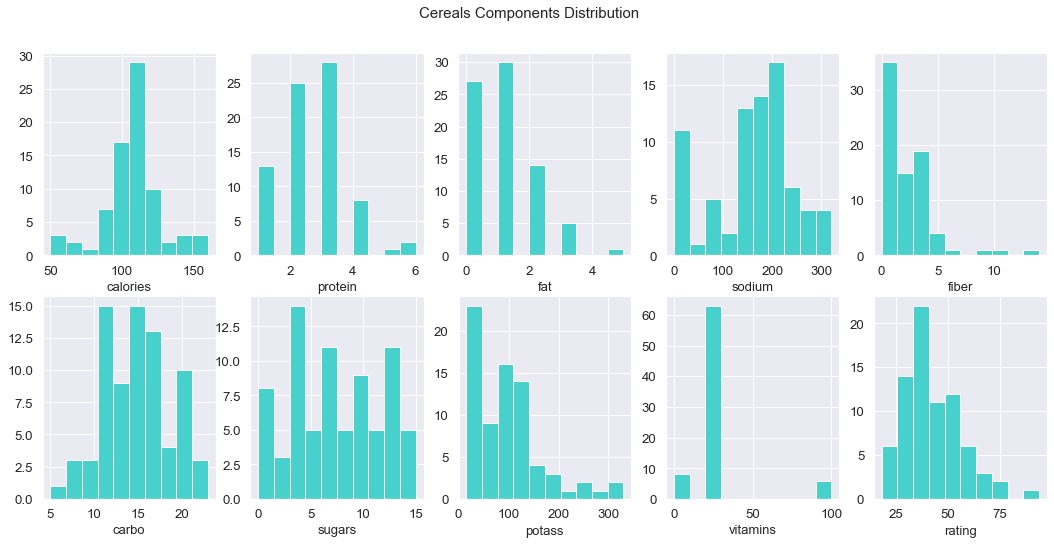

In [507]:
#creates the histograms for the numerical variables (excluding shelf, weight and cups)
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(18,8))
i=0

#adjust the space between main title and subplots
fig.subplots_adjust(top=0.90)

for row in ax:
    for col in row:
        n=cereals_df_2.columns[i]
        i=i+1
        plt.subplot(2,5,i)
        plt.hist(cereals_df_2[n], color='mediumturquoise')
        plt.xlabel(n, fontsize=13)
               
plt.suptitle("Cereals Components Distribution", size=15)   
plt.show()

**Key findings on the components of the cereals:**   
-Most of the cereals have between 80 and 125 calories per serving;  
-The majority of the cereals have high sodium values - over 150 milligrams;  
-Fiber amounts are quite low in most of the cereals (0-4 grams);  
-Sugar values are quite spread out among the cereals;  
-Most of cereals have up to 130 milligrams of potassium;  
-The ratings for the cereals range mostly from 25 to 55 scores.  

In [508]:
#compute correlation table to analyze variables relationship
corr=cereals_df_2.corr().round(2)
corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
calories,1.00,0.02,0.50,0.30,-0.29,0.26,0.57,-0.07,0.27,-0.69
protein,0.02,1.00,0.21,-0.05,0.50,-0.03,-0.29,0.56,0.01,0.47
fat,0.50,0.21,1.00,-0.01,0.02,-0.30,0.30,0.20,-0.03,-0.41
sodium,0.30,-0.05,-0.01,1.00,-0.07,0.30,0.06,-0.04,0.36,-0.40
fiber,-0.29,0.50,0.02,-0.07,1.00,-0.38,-0.14,0.91,-0.03,0.58
carbo,0.26,-0.03,-0.30,0.30,-0.38,1.00,-0.47,-0.37,0.22,0.09
sugars,0.57,-0.29,0.30,0.06,-0.14,-0.47,1.00,0.00,0.10,-0.76
potass,-0.07,0.56,0.20,-0.04,0.91,-0.37,0.00,1.00,-0.01,0.42
vitamins,0.27,0.01,-0.03,0.36,-0.03,0.22,0.10,-0.01,1.00,-0.24
rating,-0.69,0.47,-0.41,-0.40,0.58,0.09,-0.76,0.42,-0.24,1.00


<AxesSubplot:>

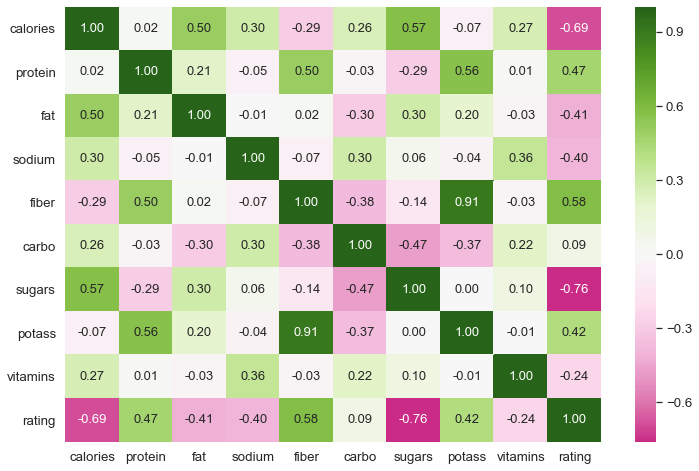

In [543]:
#create a heatmap to demonstrate the correlation magnitude among the variables
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, annot_kws={'fontsize':13},
            fmt=".2f", cmap='PiYG', center=0) #annot argument writes the data value into each cell 
                                                #fmt parameter add text to the heatmap cell and formats the cell values    

**Most strongly correlated variables**  
Fiber and potassium are the highest correlated variables. Their coefficient is 0.91, which indicates that it is a strong and positive relationship. It represents that the more fiber a cereal contains, the more potassium it may have, and vice-versa. 
Another pair of relatively strong correlation is sugar and rating, with a coefficient of -0.76. It means that the more sugar a cereal has, the lower the rating might be. 

Text(0.5, 1.0, 'Sugars Amont vs Rating')

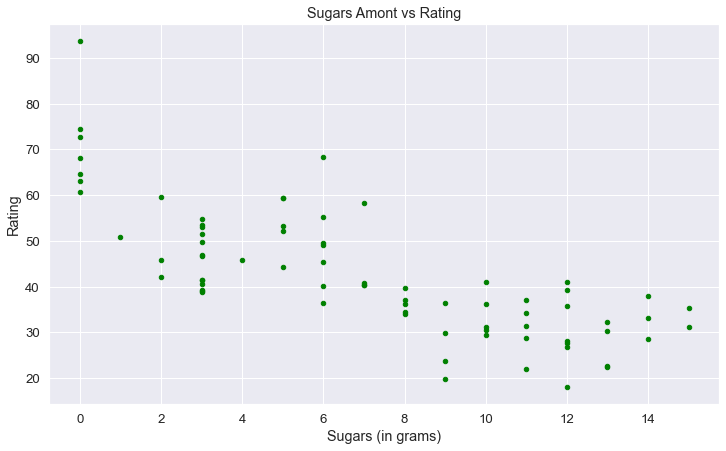

In [549]:
#plot a scatterplot of sugars and ratings variables
cereals_df.plot.scatter(x='sugars',y='rating',c='green', figsize=(12,7))
plt.xlabel("Sugars (in grams)")
plt.ylabel("Rating")
plt.title('Sugars Amont vs Rating')

The scatterplot confirms the strong negative correlation between the amount of sugars in the cereals and the ratings.

In [537]:
#replace values for cereal types
cereals_df['type'] = cereals_df['type'].apply(lambda a: str(a).replace('C', 'Cold').replace('H', 'Hot'))

In [512]:
#display all the columns
pd.options.display.max_rows = None
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,Cold,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
1,100%_Natural_Bran,Q,Cold,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
2,All-Bran,K,Cold,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,Cold,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
4,Almond_Delight,R,Cold,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
5,Apple_Cinnamon_Cheerios,G,Cold,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
6,Apple_Jacks,K,Cold,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
7,Basic_4,G,Cold,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
8,Bran_Chex,R,Cold,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253
9,Bran_Flakes,P,Cold,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.00,0.67,53.313813


In [513]:
#group cereal types using the mean rating
types_df=cereals_df.groupby(['type'])['rating'].mean()
types_df

type
Cold    42.095218
Hot     56.737708
Name: rating, dtype: float64

In [514]:
type(types_df)

pandas.core.series.Series

<AxesSubplot:title={'center':'Cereals Rating by Type'}, ylabel='type'>

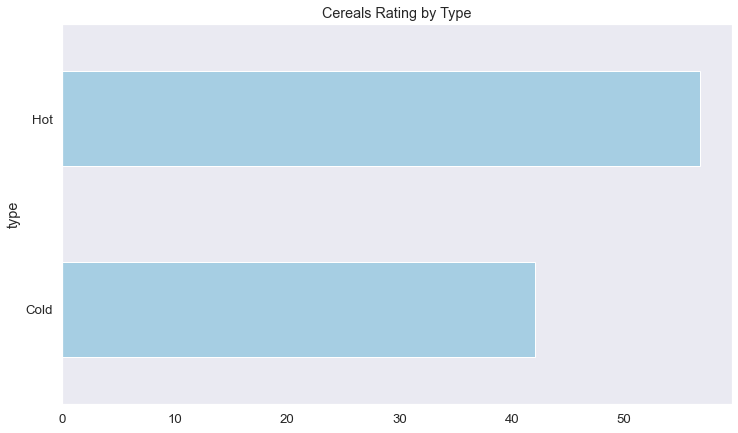

In [515]:
#plot cereal ratings by type 
types_df.plot.barh(x='type', y='rating', 
                           title='Cereals Rating by Type', legend=False, figsize=(12,7), cmap='Paired', grid=False)

Hot cereals have a higher average of rating.

In [516]:
#change the manufacturer names
cereals_df['mfr'] = cereals_df['mfr'].apply(lambda a: str(a).replace('A', 'American Home Food')
                                              .replace('G', 'General Mills').replace('K', 'Kellogs')
                                              .replace('N', 'Nabisco').replace('P', 'Post')
                                              .replace('Q', 'Quaker Oats').replace('R','Ralson Purina'))      
                                            

In [517]:
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,Nabisco,Cold,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
1,100%_Natural_Bran,Quaker Oats,Cold,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
2,All-Bran,Kellogs,Cold,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,Kellogs,Cold,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
4,Almond_Delight,Ralson Purina,Cold,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
5,Apple_Cinnamon_Cheerios,General Mills,Cold,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
6,Apple_Jacks,Kellogs,Cold,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
7,Basic_4,General Mills,Cold,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
8,Bran_Chex,Ralson Purina,Cold,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253
9,Bran_Flakes,Post,Cold,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.00,0.67,53.313813


In [518]:
#group cereal manufacturer using the mean rating
manufacturer=cereals_df.groupby(['mfr'])['rating'].mean()
manufacturer

mfr
American Home Food    54.850917
General Mills         34.485852
Kellogs               44.038462
Nabisco               67.968567
Post                  41.705744
Quaker Oats           42.915990
Ralson Purina         41.542997
Name: rating, dtype: float64

In [519]:
#convert series to dataframe
manufacturer_df = pd.DataFrame(manufacturer)

In [520]:
manufacturer_df

,rating
mfr,
American Home Food,54.850917
General Mills,34.485852
Kellogs,44.038462
Nabisco,67.968567
Post,41.705744
Quaker Oats,42.915990
Ralson Purina,41.542997


In [521]:
#convert "mfr" variable into a column
manufacturer_df.reset_index('mfr', inplace=True)

In [522]:
#check if the index has been converted into a column
manufacturer_df

,mfr,rating
0,American Home Food,54.850917
1,General Mills,34.485852
2,Kellogs,44.038462
3,Nabisco,67.968567
4,Post,41.705744
5,Quaker Oats,42.915990
6,Ralson Purina,41.542997


In [523]:
#sort the ratings by descending order
manufacturer_df.sort_values('rating', ascending=False, inplace=True)
manufacturer_df

,mfr,rating
3,Nabisco,67.968567
0,American Home Food,54.850917
2,Kellogs,44.038462
5,Quaker Oats,42.915990
4,Post,41.705744
6,Ralson Purina,41.542997
1,General Mills,34.485852


In [524]:
#check the variables data types
manufacturer_df.dtypes

mfr        object
rating    float64
dtype: object

In [525]:
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,Nabisco,Cold,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
1,100%_Natural_Bran,Quaker Oats,Cold,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
2,All-Bran,Kellogs,Cold,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,Kellogs,Cold,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
4,Almond_Delight,Ralson Purina,Cold,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
5,Apple_Cinnamon_Cheerios,General Mills,Cold,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
6,Apple_Jacks,Kellogs,Cold,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
7,Basic_4,General Mills,Cold,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
8,Bran_Chex,Ralson Purina,Cold,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253
9,Bran_Flakes,Post,Cold,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.00,0.67,53.313813


Text(0, 0.5, 'Rating')

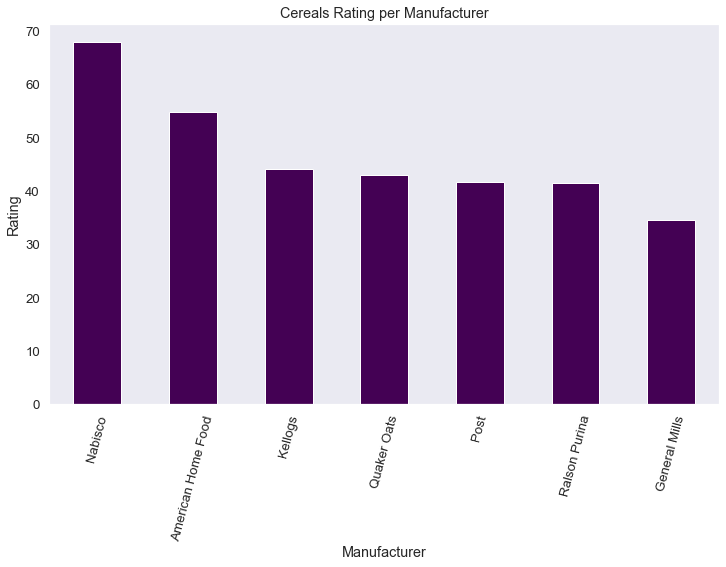

In [535]:
#plot a bar chart
manufacturer_df.plot.bar(x='mfr', y='rating', 
                           title='Cereals Rating per Manufacturer', legend=False, figsize=(12,7), cmap='viridis', grid=False,)
plt.xticks(rotation=75)
plt.xlabel("Manufacturer")
plt.ylabel("Rating")